In [53]:
import pandas as pd
import pickle
import os
import sys
sys.path.append('..\\src')
import fsq_yelp_parsing
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import Image
import numpy as np

## Unpickle combined_df, citybikes_df, fsq_df and yelp_df

In [71]:
# UNPICKLE CITYBIKES DF
with open('../data/citybikes_filled_df.pickle', 'rb') as df:
    citybikes_df = pickle.load(df)

citybikes_df.head(5)

,name,id,timestamp,longitude,latitude,slots,free_bikes,empty_slots,has_ebikes,ebikes,payment,renting,returning
0,Harmon St at Adeline St,d0e8f4f1834b7b33a3faf8882f567ab8,2024-04-02T18:29:27.066000Z,-122.270582,37.849735,15,9,6,True,0,"[key, creditcard]",1,1
1,Fountain Alley at S 2nd St,983514094dd808b1604da2dcfc2d09af,2024-04-02T18:29:26.582000Z,-121.889277,37.336188,11,8,3,True,6,"[key, creditcard]",1,1
2,Oak St at 1st St,da17603652106fda93da4e255a5b0a22,2024-04-02T18:29:27.044000Z,-121.88109,37.322125,23,14,9,True,7,"[key, creditcard]",1,1
3,Bestor Art Park,7a21c92b3b4cd2f7759107b4fdebf869,2024-04-02T18:29:26.797000Z,-121.874119,37.323678,15,12,3,True,3,"[key, creditcard]",1,1
4,5th St at Virginia St,ce34d38fb230a23c1ced12d1e16df294,2024-04-02T18:29:26.971000Z,-121.87712,37.325998,27,19,7,True,12,"[key, creditcard]",1,1


In [72]:
# UNPICKLE FSQ DF 
with open('../data/fsq_places.pickle', 'rb') as df:
    fsq_df = pickle.load(df)

fsq_df.head(5)

,reference_bike_stn,fsq_id,fsq_cat_id,fsq_cat_name,lat,long,name,street_address,zip,city,distance_from_bike_stn
0,d0e8f4f1834b7b33a3faf8882f567ab8,4b3fc82cf964a520a1ae25e3,13303,Mexican Restaurant,37.850052,-122.270523,Las Palmas Super Burritos and Heros,3221 Adeline St,94703,Berkeley,33
1,d0e8f4f1834b7b33a3faf8882f567ab8,57da76a603a44d3f9b3ddd3b,10004,Art Gallery,37.849798,-122.271728,Firehouse Collective East/West Art Studios,1835 Harmon St,94703,Berkeley,100
2,d0e8f4f1834b7b33a3faf8882f567ab8,4b64bd80f964a52074cc2ae3,13064,Pizzeria,37.849316,-122.271629,Domino's Pizza,3264 Adeline St,94703,Berkeley,113
3,d0e8f4f1834b7b33a3faf8882f567ab8,4c12e9a51b5cef3b9cd7edc4,13102,Cantonese Restaurant,37.848703,-122.270660,Chen's Garden,1818 Alcatraz Ave,94703,Berkeley,119
4,d0e8f4f1834b7b33a3faf8882f567ab8,52fe4532498e80c8d231d768,13034,Café,37.850958,-122.271077,Rasa Caffe,3140 Martin Luther King Jr Way,94703,Berkeley,141


In [73]:
# UNPICKLE YELP DF 
with open('../data/yelp_df.pickle', 'rb') as df:
    yelp_df = pickle.load(df)

yelp_df.head(5)

,reference_bike_stn,yelp_id,yelp_cat_alias,lat,long,name,street_address,zip,city,price,rating,review_count,distance_from_bike_stn
0,d0e8f4f1834b7b33a3faf8882f567ab8,OjMumhyL26n5fDZ2CQLnyg,ethiopian,37.850301,-122.271266,Lemat,3212 Adeline St,94703,Berkeley,$$,4.4,239,87
1,d0e8f4f1834b7b33a3faf8882f567ab8,-EpmBwODsvQ6gHx2IuVO5w,cafes,37.850017,-122.270532,El Tiny Cafe,3219 Adeline St,94703,Berkeley,None,4.8,60,32
2,d0e8f4f1834b7b33a3faf8882f567ab8,shRP4Vxu2hDdmdsHf-5DmQ,burgers,37.848520,-122.260380,A+ Burger,6228 Telegraph Ave,94609,Oakland,$$,4.4,859,896
3,d0e8f4f1834b7b33a3faf8882f567ab8,pJdwr6JoCVXTKbdJlm-rdg,italian,37.850900,-122.278200,Creekwood,3121 Sacramento St,94702,Berkeley,$$,4.6,481,684
4,d0e8f4f1834b7b33a3faf8882f567ab8,nt46Amrqx5qwTyNEcO54ew,burgers,37.843820,-122.276750,Sideshow Kitchen,942 Stanford Ave,94608,Oakland,$$,4.4,496,854


In [74]:
# combined_df = fsq_yelp_parsing.combine_yelp_fsq(fsq_df, yelp_df)

In [ ]:
# combined_df.info()

In [ ]:
# with open('../data/yelp_fsq_combined.pickle', 'wb') as df:
#     pickle.dump(combined_df, df)

In [75]:
# UNPICKLE COMBINED DF 
with open('../data/yelp_fsq_combined.pickle', 'rb') as df:
    combined_df = pickle.load(df)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52992 entries, 0 to 52991
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reference_bike_stn      52992 non-null  object 
 1   fsq_id                  25677 non-null  object 
 2   fsq_cat_id              25677 non-null  float64
 3   fsq_cat_name            25677 non-null  object 
 4   lat                     52992 non-null  float64
 5   long                    52992 non-null  float64
 6   name                    52992 non-null  object 
 7   street_address          51721 non-null  object 
 8   zip                     52972 non-null  object 
 9   city                    52992 non-null  object 
 10  distance_from_bike_stn  52992 non-null  int64  
 11  yelp_id                 27315 non-null  object 
 12  yelp_cat_alias          27315 non-null  object 
 13  price                   23520 non-null  object 
 14  rating                  27315 non-null

In [6]:
combined_df.head(5)

,reference_bike_stn,fsq_id,fsq_cat_id,fsq_cat_name,lat,long,name,street_address,zip,city,distance_from_bike_stn,yelp_id,yelp_cat_alias,price,rating,review_count
0,d0e8f4f1834b7b33a3faf8882f567ab8,4b3fc82cf964a520a1ae25e3,13303.0,Mexican Restaurant,37.850052,-122.270523,Las Palmas Super Burritos and Heros,3221 Adeline St,94703,Berkeley,33,NaN,NaN,NaN,NaN,NaN
1,d0e8f4f1834b7b33a3faf8882f567ab8,57da76a603a44d3f9b3ddd3b,10004.0,Art Gallery,37.849798,-122.271728,Firehouse Collective East/West Art Studios,1835 Harmon St,94703,Berkeley,100,NaN,NaN,NaN,NaN,NaN
2,d0e8f4f1834b7b33a3faf8882f567ab8,4b64bd80f964a52074cc2ae3,13064.0,Pizzeria,37.849316,-122.271629,Domino's Pizza,3264 Adeline St,94703,Berkeley,113,NaN,NaN,NaN,NaN,NaN
3,d0e8f4f1834b7b33a3faf8882f567ab8,4c12e9a51b5cef3b9cd7edc4,13102.0,Cantonese Restaurant,37.848703,-122.270660,Chen's Garden,1818 Alcatraz Ave,94703,Berkeley,119,NaN,NaN,NaN,NaN,NaN
4,d0e8f4f1834b7b33a3faf8882f567ab8,52fe4532498e80c8d231d768,13034.0,Café,37.850958,-122.271077,Rasa Caffe,3140 Martin Luther King Jr Way,94703,Berkeley,141,NaN,NaN,NaN,NaN,NaN


## Remove venues returned by BOTH Yelp & FSQ per given bike station

In [76]:
repeated_venues_per_bikestn = fsq_yelp_parsing.find_repeat_venues(combined_df)
print(repeated_venues_per_bikestn)

[('18ecb3d50f2e42cbeaa54e2700fa3093', 'Best Coast Burritos', -122.289815, 37.839813, 2), ('2ce729f9d95e9007a9069c8e0d365511', 'Astro Park', -122.249004, 37.809232, 2), ('315bd655b7cf06f4cf2e3c78879043e4', 'Astro Park', -122.249004, 37.809232, 2), ('5d6e0c578a1ddd55e642440bed2c6cce', 'Best Coast Burritos', -122.289815, 37.839813, 2), ('7355d2865f4ab7430c4fccf859e70d74', 'Astro Park', -122.249004, 37.809232, 2), ('99889922f5848c7ca3e2c2f740cebd9f', 'Sunrise Deli', -122.48075, 37.76315, 2), ('a73276ab34067c112ab469c5107e1d2c', 'Best Coast Burritos', -122.289815, 37.839813, 2), ('ade8fb7d8bab829cc6b2b752c02882ff', 'Astro Park', -122.249004, 37.809232, 2), ('c00825d99ce3a531a80181f00591df1d', 'Best Coast Burritos', -122.289815, 37.839813, 2), ('cbdeb72b794ae1050a177368bee1364e', 'Best Coast Burritos', -122.289815, 37.839813, 2), ('dd90adb9ef523d88e8ffcc50c1bc2c47', 'Best Coast Burritos', -122.289815, 37.839813, 2), ('f72a227c01e328e88de3e27e883b5a42', 'Best Coast Burritos', -122.289815, 37.

In [77]:
# Remove the entry returned by FSQ (since it contains less info) for a given bike station where the same venue is returned by both APIs
for item in repeated_venues_per_bikestn:
    reference_bike_stn = item[0]
    name = item[1]
    long = item[2]
    lat = item[3]
    
    mask = (combined_df['reference_bike_stn'] == reference_bike_stn) & \
           (combined_df['name'] == name) & \
           (combined_df['long'] == long) & \
           (combined_df['lat'] == lat)
    
    mask &= (combined_df['fsq_id'].notnull())
    
    combined_df.drop(combined_df[mask].index, inplace=True)

combined_df.reset_index(drop=True, inplace=True)

In [78]:
# Check that there are no more repeated venues returned per bike station
repeated_venues_per_bikestn = fsq_yelp_parsing.find_repeat_venues(combined_df)
print(repeated_venues_per_bikestn)

[('99889922f5848c7ca3e2c2f740cebd9f', 'Sunrise Deli', -122.48075, 37.76315, 2)]


In [80]:
# There is one repeated venue that remains
# It looks like a mistake was probably make on Yelp's part 
filtered = combined_df[(combined_df['reference_bike_stn'] == '99889922f5848c7ca3e2c2f740cebd9f') & (combined_df['name'] == 'Sunrise Deli')]
filtered

,reference_bike_stn,fsq_id,fsq_cat_id,fsq_cat_name,lat,long,name,street_address,zip,city,distance_from_bike_stn,yelp_id,yelp_cat_alias,price,rating,review_count
47931,99889922f5848c7ca3e2c2f740cebd9f,NaN,NaN,NaN,37.76315,-122.48075,Sunrise Deli,2115 Irving St,94122,San Francisco,1006,e02eHaL0toY64Tzodnx8_Q,delis,$$,3.8,632.0
47947,99889922f5848c7ca3e2c2f740cebd9f,NaN,NaN,NaN,37.76315,-122.48075,Sunrise Deli,2115 Irving St,94122,San Francisco,1006,jwr5rh2MNwynoYNlSS6JnQ,mideastern,$,2.3,53.0


In [81]:
# Investigate using Google to see which entry is the mistake and delete it from combined_df 
combined_df.drop(filtered.index[1], inplace=True)

In [82]:
# Confirm that the correct row was deleted
filtered = combined_df[(combined_df['reference_bike_stn'] == '99889922f5848c7ca3e2c2f740cebd9f') & (combined_df['name'] == 'Sunrise Deli')]
filtered

,reference_bike_stn,fsq_id,fsq_cat_id,fsq_cat_name,lat,long,name,street_address,zip,city,distance_from_bike_stn,yelp_id,yelp_cat_alias,price,rating,review_count
47931,99889922f5848c7ca3e2c2f740cebd9f,NaN,NaN,NaN,37.76315,-122.48075,Sunrise Deli,2115 Irving St,94122,San Francisco,1006,e02eHaL0toY64Tzodnx8_Q,delis,$$,3.8,632.0


In [83]:
# Quick look at stats for # venues returned for each bike station
venues_per_bikestn = combined_df.groupby('reference_bike_stn').size()
venues_per_bikestn.describe()

count    555.000000
mean      95.436036
std        8.298849
min       43.000000
25%       94.000000
50%      100.000000
75%      100.000000
max      100.000000
dtype: float64

In [84]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52967 entries, 0 to 52967
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reference_bike_stn      52967 non-null  object 
 1   fsq_id                  25653 non-null  object 
 2   fsq_cat_id              25653 non-null  float64
 3   fsq_cat_name            25653 non-null  object 
 4   lat                     52967 non-null  float64
 5   long                    52967 non-null  float64
 6   name                    52967 non-null  object 
 7   street_address          51696 non-null  object 
 8   zip                     52947 non-null  object 
 9   city                    52967 non-null  object 
 10  distance_from_bike_stn  52967 non-null  int64  
 11  yelp_id                 27314 non-null  object 
 12  yelp_cat_alias          27314 non-null  object 
 13  price                   23519 non-null  object 
 14  rating                  27314 non-null

In [85]:
# # Pickle combined_df which had repeated venues removed:
# with open('../data/yelp_fsq_combined_norepeatvenues.pickle', 'wb') as df:
#     pickle.dump(combined_df, df)

In [87]:
# Unpickle combined df with repeats removed 
with open('../data/yelp_fsq_combined_norepeatvenues.pickle', 'rb') as df:
    combined_df_norepeats = pickle.load(df)

combined_df_norepeats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52967 entries, 0 to 52967
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reference_bike_stn      52967 non-null  object 
 1   fsq_id                  25653 non-null  object 
 2   fsq_cat_id              25653 non-null  float64
 3   fsq_cat_name            25653 non-null  object 
 4   lat                     52967 non-null  float64
 5   long                    52967 non-null  float64
 6   name                    52967 non-null  object 
 7   street_address          51696 non-null  object 
 8   zip                     52947 non-null  object 
 9   city                    52967 non-null  object 
 10  distance_from_bike_stn  52967 non-null  int64  
 11  yelp_id                 27314 non-null  object 
 12  yelp_cat_alias          27314 non-null  object 
 13  price                   23519 non-null  object 
 14  rating                  27314 non-null

### Map the locations of the bike stations

In [92]:
center_lat = (37.5 + 38.0) / 2
center_lon = (-122.5 + -121.5) / 2

m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index, row in citybikes_df.iterrows():
    lat = row['latitude']
    lon = row['longitude']

    folium.Marker([lat, lon]).add_to(marker_cluster)

display(m)

### Box plot of the number of bike slots for a given bike station

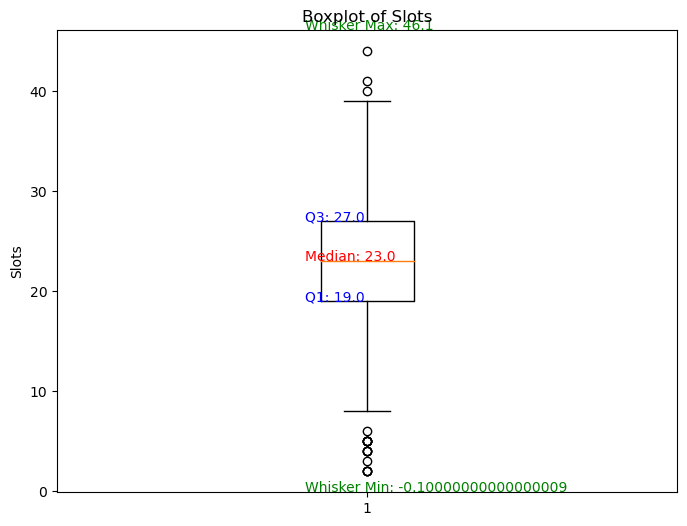

In [93]:
plt.figure(figsize=(8, 6))  
plt.boxplot(citybikes_df['slots'])

median = np.median(citybikes_df['slots'])
q1, q3 = np.percentile(citybikes_df['slots'], [25, 75])
whisker_min, whisker_max = plt.gca().get_ylim()

plt.text(0.9, median, f'Median: {median}', color='red', fontsize=10)
plt.text(0.9, q1, f'Q1: {q1}', color='blue', fontsize=10)
plt.text(0.9, q3, f'Q3: {q3}', color='blue', fontsize=10)
plt.text(0.9, whisker_min, f'Whisker Min: {whisker_min}', color='green', fontsize=10)
plt.text(0.9, whisker_max, f'Whisker Max: {whisker_max}', color='green', fontsize=10)

plt.title('Boxplot of Slots')
plt.ylabel('Slots')

plt.show()

### Scatterplots of the number of venues returned by both APIs for each bike station

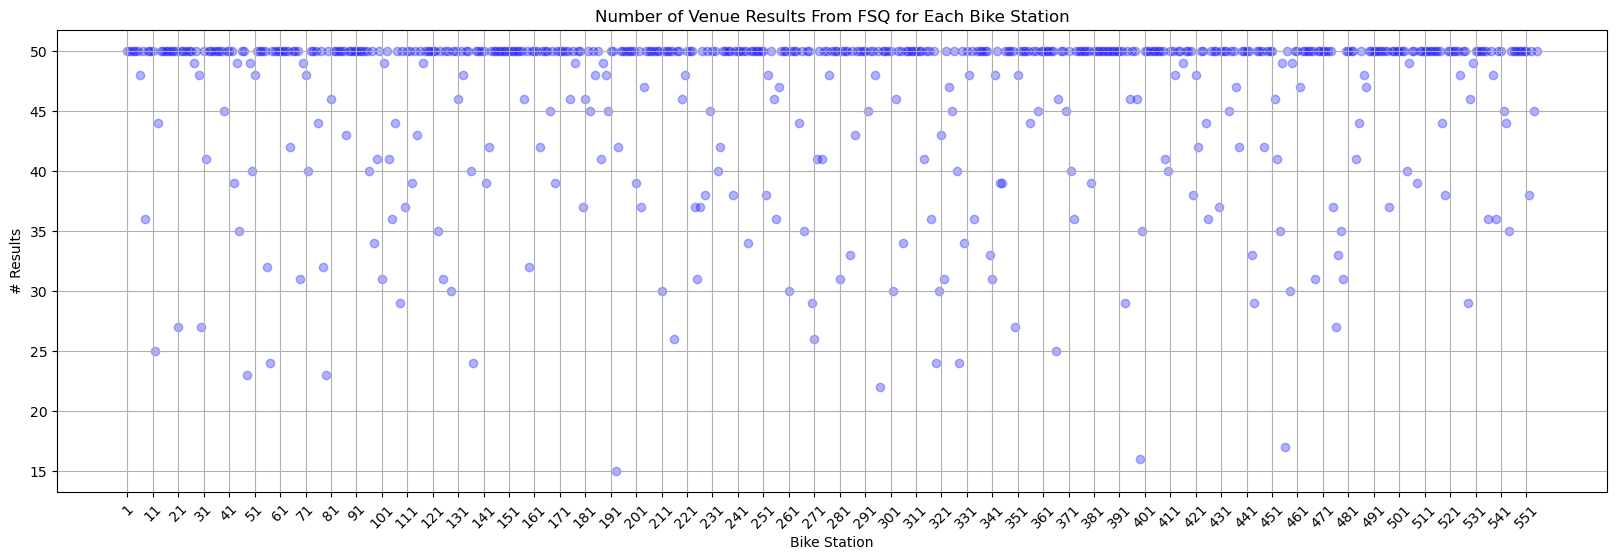

In [94]:
grouped_data_fsq = fsq_df.groupby('reference_bike_stn').size().reset_index(name='row_count')

plt.figure(figsize=(20, 6))  
plt.scatter(range(1, 556), grouped_data_fsq['row_count'], color='blue', alpha=0.3)  
plt.title('Number of Venue Results From FSQ for Each Bike Station')
plt.xlabel('Bike Station')
plt.ylabel('# Results')
plt.grid(True)
plt.xticks(range(1, 556, 10), rotation=45) 
plt.show()

In [97]:
# Which bike stations have less venues returned by the API?
max_result = 50
threshold_percentage = 75
threshold_value = max_result * (threshold_percentage / 100)
outlier_bike_stn_fsq = grouped_data_fsq[(grouped_data_fsq['row_count'] < threshold_value)]
print(outlier_bike_stn_fsq)

                   reference_bike_stn  row_count
7    03cc61af40764524160f132da0f3f681         36
11   05c88a5c130147a66fe2745f53dacc37         25
20   08a97d1e8daf245e4fc7f5f3ab162213         27
29   0ceed296dc7ef21bc6dc3999e23db576         27
44   1372941b523f4ca92d4bfee7ea85ac95         35
..                                ...        ...
496  e28f658f5100e41a80d7896d356bc7f6         37
527  f113253f2f20870c00c7f115d631304d         29
535  f6c781054ead7bb20ebc00b4c71df148         36
538  f7b24d5a88d4a5280b0a123465ceeb9a         36
543  f90fd0c728ade1a5f3ca0327f3f7eccb         35

[73 rows x 2 columns]


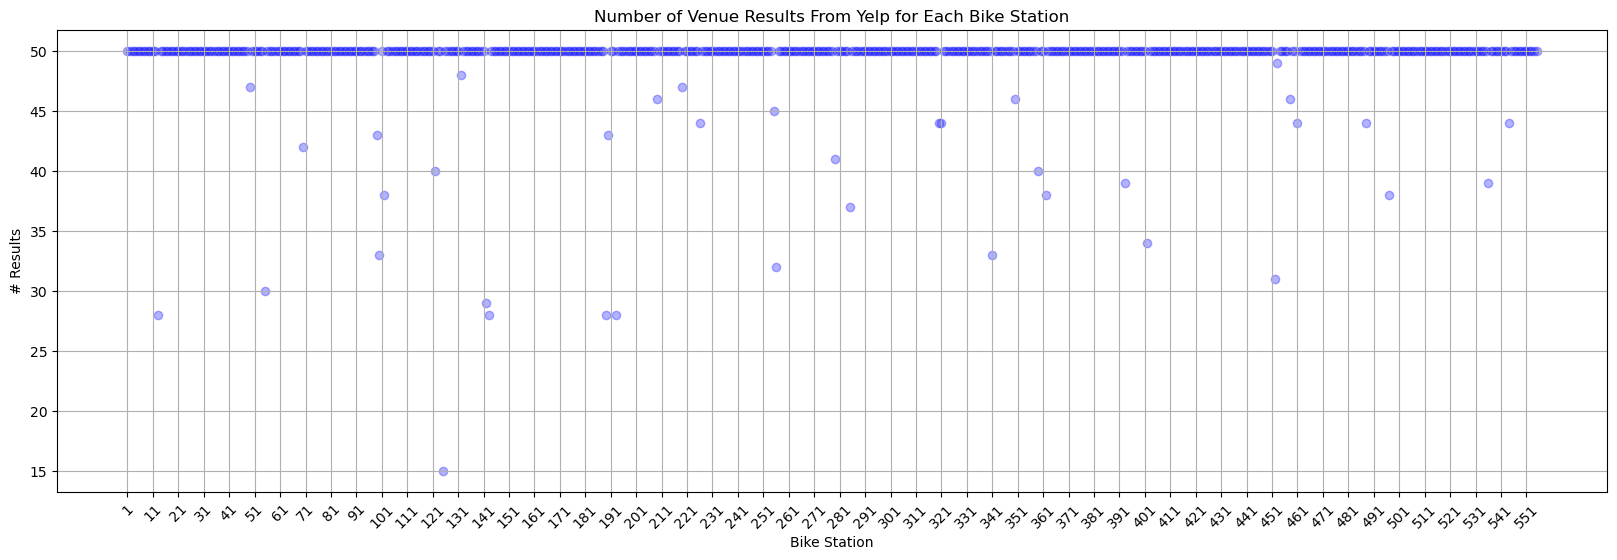

In [98]:
grouped_data_yelp = yelp_df.groupby('reference_bike_stn').size().reset_index(name='row_count')

plt.figure(figsize=(20, 6)) 
plt.scatter(range(1, 556), grouped_data_yelp['row_count'], color='blue', alpha=0.3)  
plt.title('Number of Venue Results From Yelp for Each Bike Station')
plt.xlabel('Bike Station')
plt.ylabel('# Results')
plt.grid(True)
plt.xticks(range(1, 556, 10), rotation=45)  
plt.show()

In [99]:
max_result = 50
threshold_percentage = 75
threshold_value = max_result * (threshold_percentage / 100)
outlier_bike_stn_yelp = grouped_data_yelp[(grouped_data_yelp['row_count'] < threshold_value)]
print(outlier_bike_stn_yelp)

                   reference_bike_stn  row_count
12   067511925522b73324038e5a84bd82e3         28
54   17468bb5d5f9880c081fd67d02762c04         30
99   2d86977182197367c646152cca0e821a         33
124  3962b15d560bc3563bcdd0e638d9f0f2         15
141  418398cccab726cd172ec1d307f282c7         29
142  41f27fdd53fede0d5357c2c171edc3af         28
188  56d0385bcfa455f8eaca562d8ba18ac3         28
192  59f57a632668a24ab18d8bc9ff703af2         28
255  73f8aa6ec3250de2a02cc0763f5a19eb         32
284  813512459d9c9f8a7291e00a9c46e467         37
340  a39949a03aa488410e33371365084987         33
401  ba68e968feece64c5ae1449160642bd1         34
451  cd3da1bc74db27b06bea1a45432d2cbf         31


In [101]:
# Bike stations that have less venues returned by BOTH APIs
intersection = outlier_bike_stn_fsq.merge(outlier_bike_stn_yelp, on='reference_bike_stn')
print(intersection)

                 reference_bike_stn  row_count_x  row_count_y
0  3962b15d560bc3563bcdd0e638d9f0f2           31           15
1  59f57a632668a24ab18d8bc9ff703af2           15           28
2  73f8aa6ec3250de2a02cc0763f5a19eb           36           32
3  813512459d9c9f8a7291e00a9c46e467           33           37
4  a39949a03aa488410e33371365084987           31           33


### Histograms of distance of venues from a given bike station

Text(0, 0.5, 'Frequency')

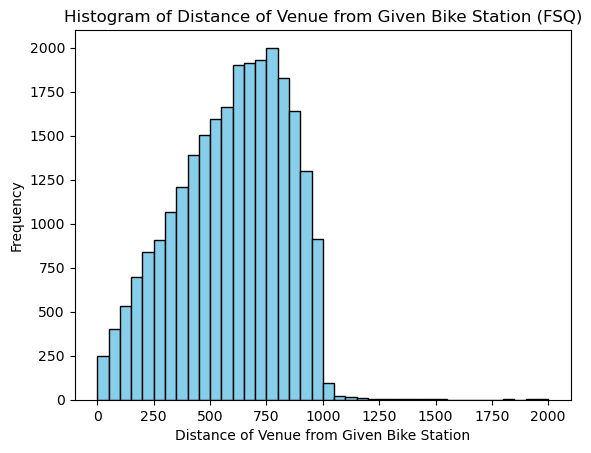

In [102]:
plt.hist(fsq_df['distance_from_bike_stn'], bins=range(0, 2001, 50), color='skyblue', edgecolor='black')

plt.title('Histogram of Distance of Venue from Given Bike Station (FSQ)')
plt.xlabel('Distance of Venue from Given Bike Station')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

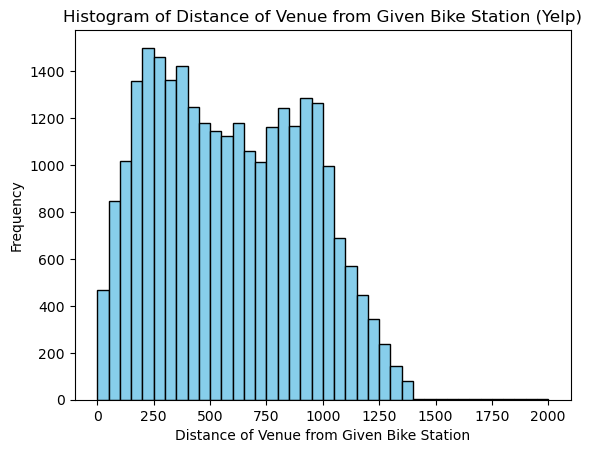

In [35]:
plt.hist(yelp_df['distance_from_bike_stn'], bins=range(0, 2001, 50), color='skyblue', edgecolor='black')

plt.title('Histogram of Distance of Venue from Given Bike Station (Yelp)')
plt.xlabel('Distance of Venue from Given Bike Station')
plt.ylabel('Frequency')

### Yelp returns venues that are closer to bike stations compared to FSQ
### Even though I limited by queries to a radius of 1000m, venues outside of that circle are still returned by both APIs, especially Yelp

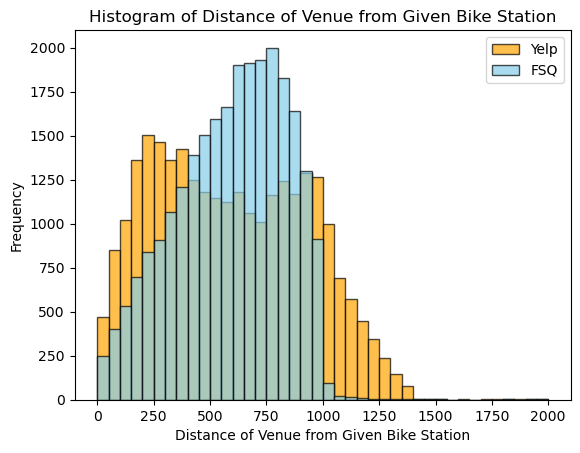

In [38]:
plt.hist(yelp_df['distance_from_bike_stn'], bins=range(0, 2001, 50), color='orange', edgecolor='black', alpha=0.7, label='Yelp')

plt.hist(fsq_df['distance_from_bike_stn'], bins=range(0, 2001, 50), color='skyblue', edgecolor='black', alpha=0.7, label='FSQ')

plt.title('Histogram of Distance of Venue from Given Bike Station')
plt.xlabel('Distance of Venue from Given Bike Station')
plt.ylabel('Frequency')

plt.legend()

plt.show()